## Data Exploration

### Import Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.under_sampling import RandomUnderSampler

### Data Visualization

In [3]:
train_df = pd.read_csv('train.csv')

In [3]:
train_df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0
1,1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1
2,2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0
3,3,Female,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0
4,4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0
...,...,...,...,...,...,...,...,...,...,...,...,...
11504793,11504793,Male,48,1,6.0,0,1-2 Year,Yes,27412.0,26.0,218,0
11504794,11504794,Female,26,1,36.0,0,< 1 Year,Yes,29509.0,152.0,115,1
11504795,11504795,Female,29,1,32.0,1,< 1 Year,No,2630.0,152.0,189,0
11504796,11504796,Female,51,1,28.0,0,1-2 Year,Yes,48443.0,26.0,274,1


In [4]:
train_df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07
mean,5.752398e+06,3.838356e+01,9.980220e-01,2.641869e+01,4.629966e-01,3.046137e+04,1.124254e+02,1.638977e+02,1.229973e-01
std,3.321149e+06,1.499346e+01,4.443120e-02,1.299159e+01,4.986289e-01,1.645475e+04,5.403571e+01,7.997953e+01,3.284341e-01
min,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,2.630000e+03,1.000000e+00,1.000000e+01,0.000000e+00
25%,2.876199e+06,2.400000e+01,1.000000e+00,1.500000e+01,0.000000e+00,2.527700e+04,2.900000e+01,9.900000e+01,0.000000e+00
50%,5.752398e+06,3.600000e+01,1.000000e+00,2.800000e+01,0.000000e+00,3.182400e+04,1.510000e+02,1.660000e+02,0.000000e+00
75%,8.628598e+06,4.900000e+01,1.000000e+00,3.500000e+01,1.000000e+00,3.945100e+04,1.520000e+02,2.320000e+02,0.000000e+00
max,1.150480e+07,8.500000e+01,1.000000e+00,5.200000e+01,1.000000e+00,5.401650e+05,1.630000e+02,2.990000e+02,1.000000e+00


<Axes: xlabel='Vehicle_Age', ylabel='count'>

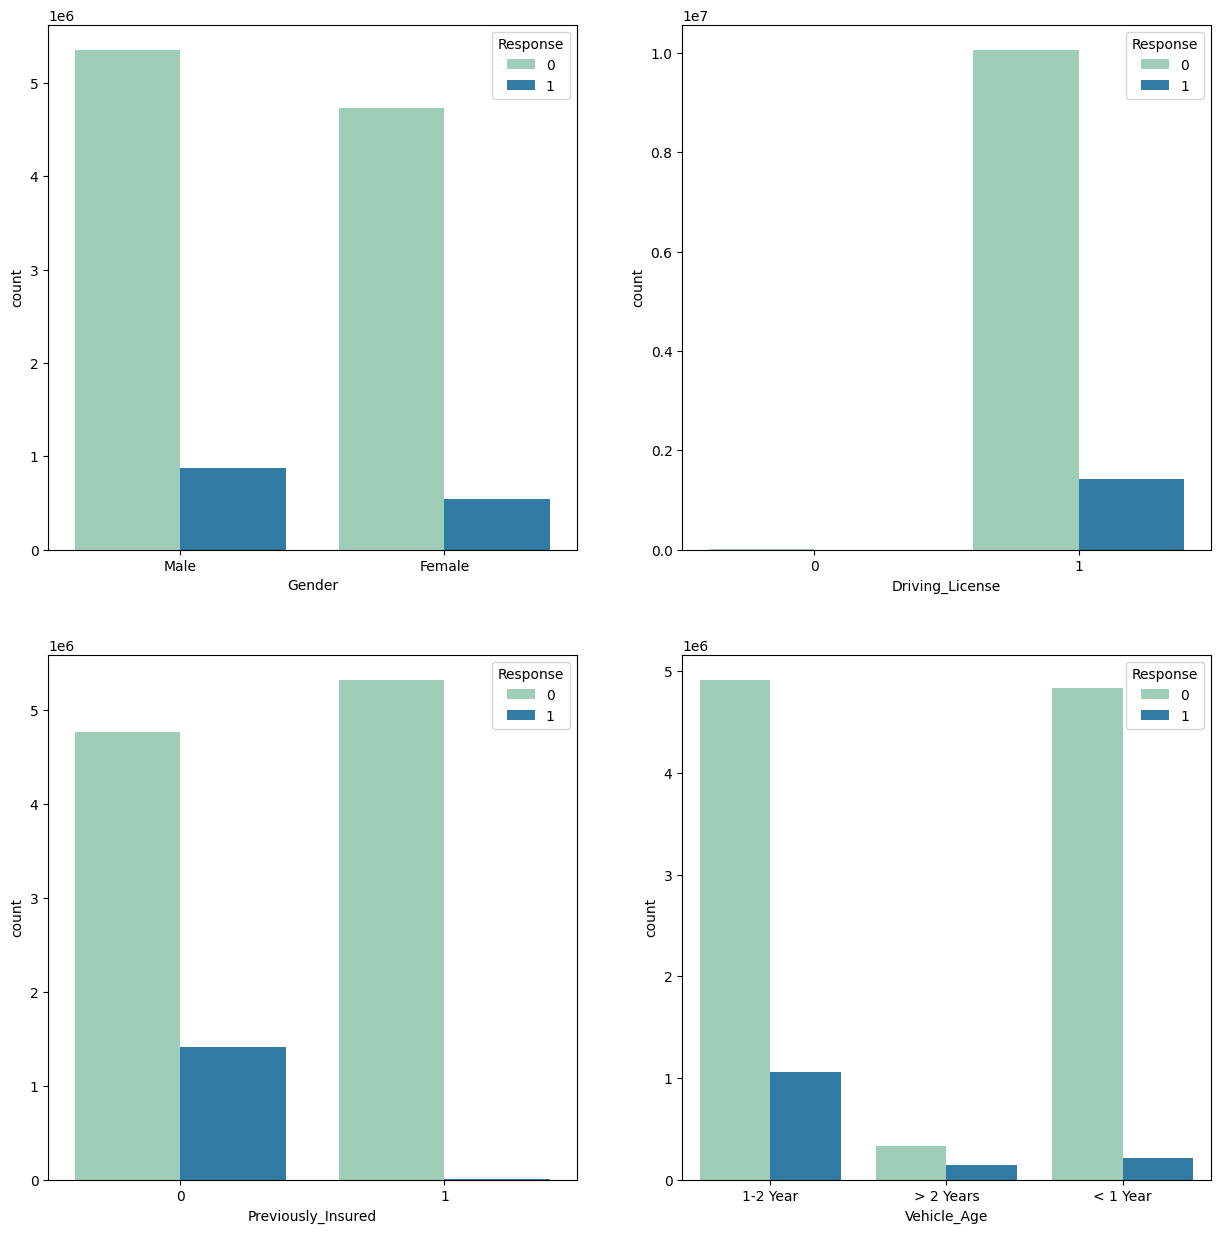

In [6]:
#Distribution of Categorical Columns
fig, axes = plt.subplots(2, 2, figsize=(15, 15)) 

sns.countplot(ax=axes[0,0],x='Gender',hue='Response',data=train_df,palette="YlGnBu")
sns.countplot(ax=axes[0,1],x='Driving_License',hue='Response',data=train_df,palette="YlGnBu")
sns.countplot(ax=axes[1,0],x='Previously_Insured',hue='Response',data=train_df,palette="YlGnBu")
sns.countplot(ax=axes[1,1],x='Vehicle_Age',hue='Response',data=train_df,palette="YlGnBu")

<Axes: xlabel='Vehicle_Damage', ylabel='count'>

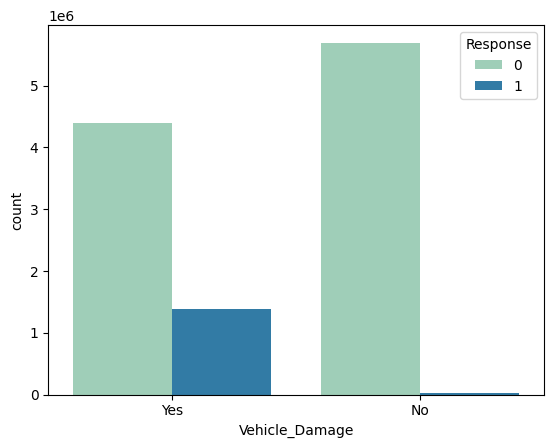

In [7]:
sns.countplot(x='Vehicle_Damage', hue='Response', data=train_df, palette="YlGnBu")

<Axes: xlabel='Response', ylabel='Count'>

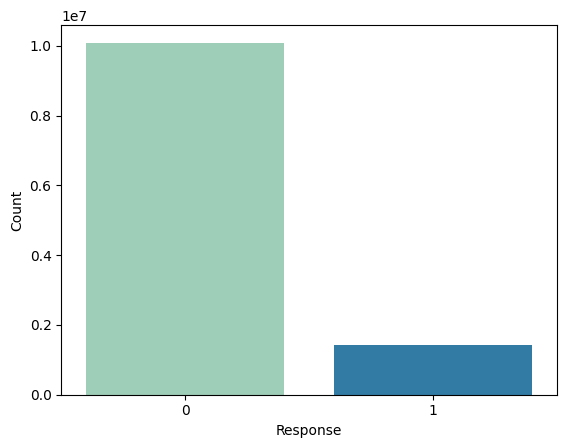

In [10]:
# The given problem is an imbalance problem as the Response variable with the value 1 is 
# significantly lower than the value zero.

Response = train_df.loc[:, "Response"].value_counts().rename('Count')
plt.xlabel("Response")
plt.ylabel("Count")

sns.barplot(x=Response.index, y=Response.values, palette="YlGnBu")

### Data Preparation

In [11]:
# Check datatypes for each columns
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11504798 entries, 0 to 11504797
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   Gender                object 
 2   Age                   int64  
 3   Driving_License       int64  
 4   Region_Code           float64
 5   Previously_Insured    int64  
 6   Vehicle_Age           object 
 7   Vehicle_Damage        object 
 8   Annual_Premium        float64
 9   Policy_Sales_Channel  float64
 10  Vintage               int64  
 11  Response              int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 1.0+ GB


In [12]:
# Check is there any null values on the train dataset
train_df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [13]:
# Check is there any duplicated values on the train dataset
train_df.duplicated().sum()

0

In [15]:
# Check the unique values for each column, to determine wether it is a catgorical or numerical
pd.Series({col:train_df[col].nunique() for col in train_df})

id                      11504798
Gender                         2
Age                           66
Driving_License                2
Region_Code                   54
Previously_Insured             2
Vehicle_Age                    3
Vehicle_Damage                 2
Annual_Premium             51728
Policy_Sales_Channel         152
Vintage                      290
Response                       2
dtype: int64

we can see that `Gender`, `Driving License`, `Previously Insured`, `Vehicle Age`, and `Vehicle Damage` have a small nunique values which is 2 minimum and 3 maximum, which we can conclude that these columns are categorical
the rest of them like `Id`, `Age`, `Region Code`, `Annual Premium`, `Policy Sales Channel`, and `Vintage` have a large nunique values, which we can conclude that these columns are numerical

In [14]:
categorical_columns = ['Gender', 'Driving_License', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage']
numerical_columns = ['id', 'Age', 'Region_Code', 'Annual_Premium','Policy_Sales_Channel', 'Vintage']

#### What can we summarize from our exploration above?


Categorical Columns

|    Feature    |   Description   | 
| ------------- | ----------------|
| Gender | Male and Female   | 
| Driving_License | 0: Does not have a Driving License yet, 1: Have a Driving License   |
| Previously_Insured | 0: The vehicle has not insured before, 1: The vehicle has insured before   |
| Vehicle_Age | Age of the vehicle   |
| Vehicle_Damage | Yes: The vehicle get damaged in the past, No: The vehicle did not get their vehicle damaged in the past   |


Numerical Columns
|    Feature    |   Description   | 
| ------------- | ----------------|
| Id | unique Id for customer   |
| Age | Age of the customer   |
| Region_Code | Unique id for customer   | 
| Annual_Premium | The amount customer needs to pay as premium in the year   |
| Policy_Sales_Channel | Anonymized Code for the channel of outreaching to the customer   |
| Vintage | How many days the customer associated with the company   |

In [16]:
df_categorical = train_df[categorical_columns]
df_categorical

,Gender,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage
0,Male,1,0,1-2 Year,Yes
1,Male,1,0,> 2 Years,Yes
2,Female,1,1,< 1 Year,No
3,Female,1,0,1-2 Year,Yes
4,Female,1,1,1-2 Year,No
...,...,...,...,...,...
11504793,Male,1,0,1-2 Year,Yes
11504794,Female,1,0,< 1 Year,Yes
11504795,Female,1,1,< 1 Year,No
11504796,Female,1,0,1-2 Year,Yes


In [17]:
df_numerical = train_df[numerical_columns]
df_numerical

,id,Age,Region_Code,Annual_Premium,Policy_Sales_Channel,Vintage
0,0,21,35.0,65101.0,124.0,187
1,1,43,28.0,58911.0,26.0,288
2,2,25,14.0,38043.0,152.0,254
3,3,35,1.0,2630.0,156.0,76
4,4,36,15.0,31951.0,152.0,294
...,...,...,...,...,...,...
11504793,11504793,48,6.0,27412.0,26.0,218
11504794,11504794,26,36.0,29509.0,152.0,115
11504795,11504795,29,32.0,2630.0,152.0,189
11504796,11504796,51,28.0,48443.0,26.0,274


In [18]:
def data_prep(df):

    df= df.drop(columns=['id','Region_Code','Policy_Sales_Channel', 'Vintage'])

    df=pd.get_dummies(df,columns=['Gender'] ,prefix='Gender', dtype=int)

    df=pd.get_dummies(df,columns=['Vehicle_Damage'] ,prefix='Damage', dtype=int)

    df=pd.get_dummies(df,columns=['Driving_License'] ,prefix='License', dtype=int)

    df=pd.get_dummies(df,columns=['Previously_Insured'] ,prefix='prev_insured', dtype=int)

    df["Age"] = pd.cut(df['Age'], bins=[0, 25, 35, 50, 100])

    df['Age']= df['Age'].cat.codes

    df['Annual_Premium'] = pd.cut(df['Annual_Premium'], bins=[0, 30000, 35000,40000, 45000, 50000, np.inf])

    df['Annual_Premium']= df['Annual_Premium'].cat.codes

    df['Vehicle_Age'] =df['Vehicle_Age'].map({'< 1 Year': 0, '1-2 Year': 1, '> 2 Years': 2})

    return df

In [19]:
df_copy = train_df.copy()

In [20]:
df_prep = data_prep(df_copy)
df_prep

,Age,Vehicle_Age,Annual_Premium,Response,Gender_Female,Gender_Male,Damage_No,Damage_Yes,License_0,License_1,prev_insured_0,prev_insured_1
0,0,1,5,0,0,1,0,1,0,1,1,0
1,2,2,5,1,0,1,0,1,0,1,1,0
2,0,0,2,0,1,0,1,0,0,1,0,1
3,1,1,0,0,1,0,0,1,0,1,1,0
4,2,1,1,0,1,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
11504793,2,1,0,0,0,1,0,1,0,1,1,0
11504794,1,0,0,1,1,0,0,1,0,1,1,0
11504795,1,0,0,0,1,0,1,0,0,1,0,1
11504796,3,1,4,1,1,0,0,1,0,1,1,0


C:\Users\walkervalentinus\AppData\Local\Temp\ipykernel_11836\2776284825.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plt.show()


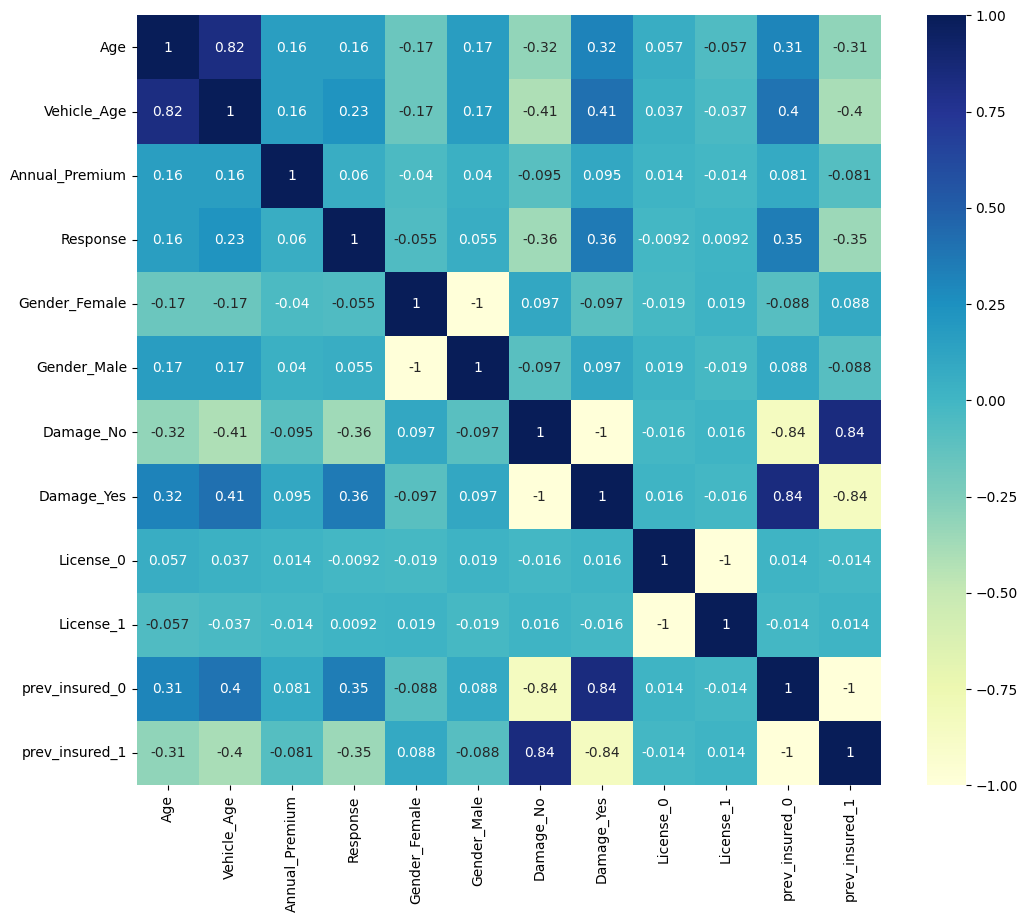

In [21]:
plt = plt.figure(figsize=(12,10))

sns.heatmap(df_prep.corr(),
            cmap='YlGnBu',
            annot=True)

plt.show()

### Modelling

In [22]:
features=['Age', 'Vehicle_Age', 'Annual_Premium', 'Gender_Female', 'Gender_Male', 'Damage_No', 'Damage_No', 'Damage_Yes', 'License_0', 'License_1', 'prev_insured_0', 'prev_insured_1']

In [23]:
X_train, X_Test, y_train, y_test = train_test_split(df_prep[features],
                                                    df_prep['Response'],
                                                    test_size=0.3,
                                                    random_state=30)

In [24]:
X_train.shape, X_Test.shape

((8053358, 12), (3451440, 12))

In [25]:
# handling imbalance response 
# %pip install imblearn 

In [25]:
RUS = RandomUnderSampler(sampling_strategy=.5, random_state=3)
X_train_rus,y_train_rus = RUS.fit_resample(df_prep[features],
                                           df_prep['Response'])

In [26]:
def performance_overview(model, X_train, y_train, X_Test, y_test):
    train_f1=f1_score(y_train, model.predict(X_train))
    train_acc=accuracy_score(y_train, model.predict(X_train))
    
    test_f1=f1_score(y_test, model.predict(X_Test))
    test_acc=accuracy_score(y_test, model.predict(X_Test))
    
    print("Train score: accuracy:{} f1:{}".format(train_acc, train_f1))
    print("Test score: accuracy:{} f1:{}".format(test_acc, test_f1))

In [27]:
# Logistic Regression
model = LogisticRegression()
model.fit(X_train_rus, y_train_rus)
performance_overview(model, X_train_rus, y_train_rus, X_Test, y_test)

Train score: accuracy:0.7495395362784638 f1:0.6910276315854474
Test score: accuracy:0.7210628027721763 f1:0.4256275240118581


In [28]:
# Decision Tree
model_DT = DecisionTreeClassifier()
model_DT.fit(X_train_rus, y_train_rus)
performance_overview(model_DT, X_train_rus, y_train_rus, X_Test, y_test)

Train score: accuracy:0.7614104194006516 f1:0.6803400557796512
Test score: accuracy:0.7613439607815868 f1:0.4399130468484922


In [29]:
# Random Forest Classifier
model_RF = RandomForestClassifier()
model_RF.fit(X_train_rus, y_train_rus)
performance_overview(model_RF, X_train_rus, y_train_rus, X_Test, y_test)

Train score: accuracy:0.76140924159346 f1:0.675117766040912
Test score: accuracy:0.7670734533991609 f1:0.4400355509986877


## Model Prediction

In [31]:
# test_df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,11504798,Female,20,1,47.0,0,< 1 Year,No,2630.0,160.0,228
1,11504799,Male,47,1,28.0,0,1-2 Year,Yes,37483.0,124.0,123
2,11504800,Male,47,1,43.0,0,1-2 Year,Yes,2630.0,26.0,271
3,11504801,Female,22,1,47.0,1,< 1 Year,No,24502.0,152.0,115
4,11504802,Male,51,1,19.0,0,1-2 Year,No,34115.0,124.0,148


In [32]:
# df_prep_test = data_prep(test_df)

In [33]:
# df_prep_test.head()

,Age,Vehicle_Age,Annual_Premium,Gender_Female,Gender_Male,Damage_No,Damage_Yes,License_0,License_1,prev_insured_0,prev_insured_1
0,0,0,0,1,0,1,0,0,1,1,0
1,2,1,2,0,1,0,1,0,1,1,0
2,2,1,0,0,1,0,1,0,1,1,0
3,0,0,0,1,0,1,0,0,1,0,1
4,3,1,1,0,1,1,0,0,1,1,0


In [35]:
# # Ensure the order of columns in test data matches the training data
# missing_cols = set(X_train_rus.columns) - set(df_prep_test.columns)
# for c in missing_cols:
#     df_prep_test[c] = 0
# df_prep_test = df_prep_test[X_train_rus.columns]

In [36]:
# test = model_RF.predict(df_prep_test)

In [37]:
# sub_df.head()

,id,Response
0,11504798,0.5
1,11504799,0.5
2,11504800,0.5
3,11504801,0.5
4,11504802,0.5


In [38]:
# sub_df['Response'] = test

In [41]:
# sub_df

,id,Response
0,11504798,0
1,11504799,1
2,11504800,1
3,11504801,0
4,11504802,0
...,...,...
7669861,19174659,0
7669862,19174660,0
7669863,19174661,0
7669864,19174662,1


In [40]:
# sub_df.to_csv('submissionRF_df.csv', index=False)